In [2]:
%pip install gymnasium

Note: you may need to restart the kernel to use updated packages.


In [10]:
import gymnasium as gym 

def run():

    env = gym.make('FrozenLake-v1', map_name= '4x4', is_slippery= False, render_mode= 'human')

    state = env.reset()
    truncated = False
    terminated = False

    while(not truncated and not terminated):

        action = env.action_space.sample() # A random action is being taken

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

    env.close()

In [11]:
run()

In [34]:
import numpy as np
import pickle
import gymnasium as gym
import matplotlib.pyplot as plt

def run_q(episodes, is_training= True, render=False):

    env = gym.make('FrozenLake-v1', map_name='4x4' , is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else: 
        f = open('frozen_lake4x4_qTable.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate = 0.9
    discount_factor = 0.9

    epsilon = 1
    epsilon_decay = 0.001
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    for episode in range(episodes):
        state = env.reset()[0]
        truncated = False
        terminated = False

        while (not truncated and not terminated):
            if is_training and  rng.random() < epsilon:
                action = env.action_space.sample()  # A random action is being taken

            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, _ = env.step(action)

            if is_training:
                q[state, action] = q[state, action] + learning_rate * (
                        reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay, 0)

        if epsilon == 0:
            learning_rate = 0.0001

        if reward == 1:
            rewards_per_episode[episode] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake4x4.png')

    if is_training:
        f = open('frozen_lake4x4_qTable.pkl', "wb")
        pickle.dump(q, f)
        f.close()

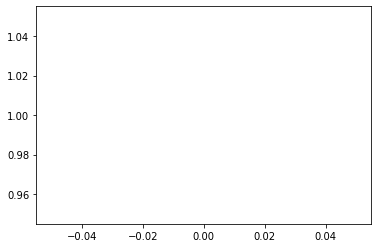

In [36]:
run_q(1, is_training= False, render=True)

In [29]:
import numpy as np
import pickle
import gymnasium as gym
import matplotlib.pyplot as plt

def run_q(episodes, is_training= True, render=False):

    env = gym.make('FrozenLake-v1', map_name='8x8' , is_slippery=False, render_mode='human' if render else None)
    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else: 
        f = open('frozen_lake8x8_qTable.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate = 0.9
    discount_factor = 0.9

    epsilon = 1
    epsilon_decay = 0.0001
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    for episode in range(episodes):
        state = env.reset()[0]
        truncated = False
        terminated = False

        while (not truncated and not terminated):
            if is_training and  rng.random() < epsilon:
                action = env.action_space.sample()  # A random action is being taken

            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, _ = env.step(action)

            if is_training:
                q[state, action] = q[state, action] + learning_rate * (
                        reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay, 0)

        if epsilon == 0:
            learning_rate = 0.0001

        if reward == 1:
            rewards_per_episode[episode] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake8x8.png')

    if is_training:
        f = open('frozen_lake8x8_qTable.pkl', "wb")
        pickle.dump(q, f)
        f.close()

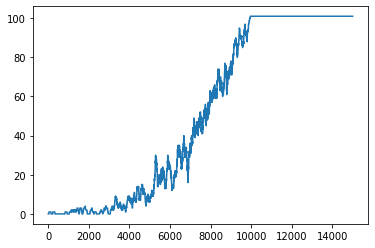

In [23]:
run_q(15000)

In [28]:
run_q(10, is_training= False, render= True)

NameError: name 'map_name' is not defined

In [34]:
def generate_custom_map(size, num_potholes):
    assert size >= 4, "Size must be at least 4"
    assert num_potholes < (size ** 2) - 3, "Too many potholes for the given size"

    # Create a map with all frozen tiles
    custom_map = np.full((size, size), 'F')

    # Set the starting point and the goal
    custom_map[0, 0] = 'S'
    custom_map[size - 1, size - 1] = 'G'

    # Randomly place potholes
    pothole_indices = np.random.choice(range(size*size), num_potholes, replace=False)
    row_indices, col_indices = np.unravel_index(pothole_indices, (size, size))
    custom_map[row_indices, col_indices] = 'H'

    return custom_map.tolist()


In [39]:
# Example: Create a FrozenLake environment with a custom map having exactly 8 potholes
custom_map = generate_custom_map(size=8, num_potholes=8)
custom_map

[['S', 'F', 'F', 'F', 'F', 'F', 'H', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'H', 'F', 'F', 'H', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'H', 'H', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
 ['F', 'F', 'F', 'F', 'H', 'F', 'F', 'F'],
 ['H', 'F', 'F', 'H', 'F', 'F', 'F', 'G']]

In [40]:
import numpy as np
import pickle
import gymnasium as gym
import matplotlib.pyplot as plt

def run_q_custom_env(episodes, is_training= True, render=False):

    env = gym.make('FrozenLake-v1', desc=custom_map , is_slippery=False, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else: 
        f = open('frozen_lake8x8Custom_qTable.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate = 0.1
    discount_factor = 0.9

    epsilon = 1
    epsilon_decay = 0.0001
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    for episode in range(episodes):
        state = env.reset()[0]
        truncated = False
        terminated = False

        while (not truncated and not terminated):
            if is_training and  rng.random() < epsilon:
                action = env.action_space.sample()  # A random action is being taken

            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, _ = env.step(action)

            if is_training:
                q[state, action] = q[state, action] + learning_rate * (
                        reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay, 0)

        if epsilon == 0:
            learning_rate = 0.0001

        if reward == 1:
            rewards_per_episode[episode] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake8x8Custom.png')

    if is_training:
        f = open('frozen_lake8x8Custom_qTable.pkl', "wb")
        pickle.dump(q, f)
        f.close()

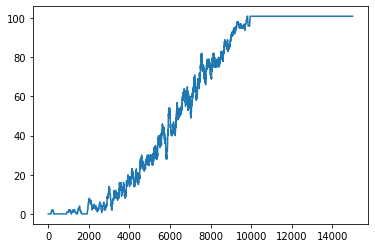

In [41]:
run_q_custom_env(15000)

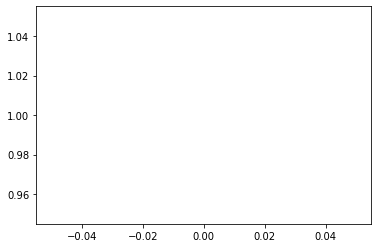

In [42]:
run_q_custom_env(1, is_training=False, render=True)